# IMPORT LIBRARIES

In [11]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as crs
import cartopy.feature as feature
import os
# from warnings import filterwarnings
# filterwarnings('ignore')

In [ ]:
f = 'D:/' # f has been defined as the directory holding all the data used for this work

# FUNCTION FOR THE COMPUTATION AND THE PLOTS

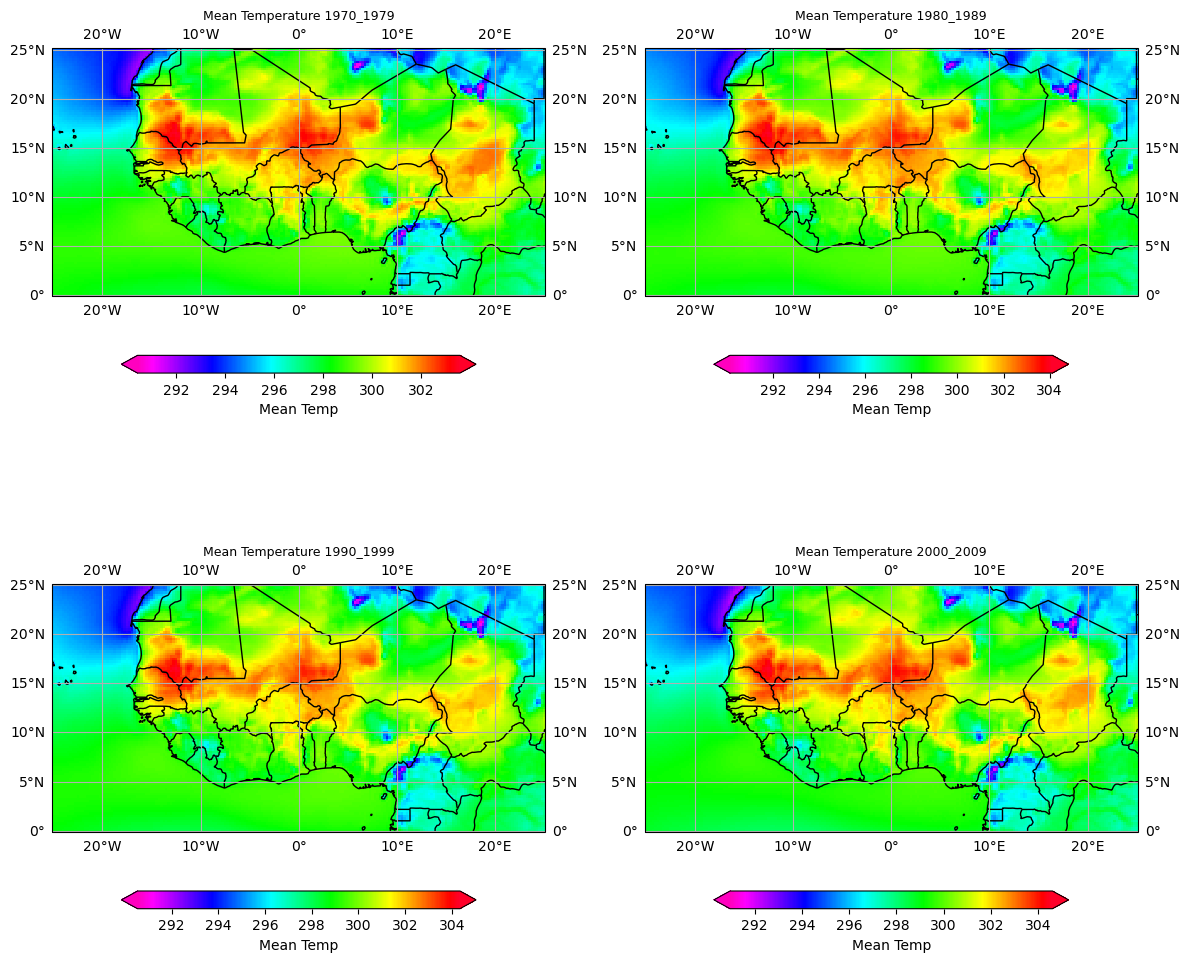

In [13]:
def plot_armor(dat1, dat2, dat3, dat4, cmap='gist_rainbow_r'):
    
    dat1 = xr.open_dataset(os.path.join(f,dat1))
    dat1 = dat1.groupby('time.year').mean('time').mean('year')
    dat2 = xr.open_dataset(os.path.join(f,dat2))
    dat2 = dat2.groupby('time.year').mean('time').mean('year')
    dat3 = xr.open_dataset(os.path.join(f,dat3))
    dat3 = dat3.groupby('time.year').mean('time').mean('year')
    dat4 = xr.open_dataset(os.path.join(f,dat4))
    dat4 = dat4.groupby('time.year').mean('time').mean('year')
    
    # dat5 = dat5.groupby('time.year').mean('time').mean('year')
    longitude, latitude, ds1 = dat1['longitude'], dat1['latitude'], dat1['t2m']
    ds2, ds3, ds4 = dat2['t2m'], dat3['t2m'], dat4['t2m']#, dat5['t2m']
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12) ,subplot_kw={'projection': crs.PlateCarree()})

    ds1_plot = ds1.plot(ax=axes[0,0], add_colorbar=False, cmap=cmap, vmax=ds1.max(), vmin=ds1.min())
    ds2_plot = ds2.plot(ax=axes[0,1], add_colorbar=False, cmap=cmap, vmax=ds2.max(), vmin=ds2.min())
    ds3_plot = ds3.plot(ax=axes[1,0], add_colorbar=False, cmap=cmap, vmax=ds3.max(), vmin=ds3.min())
    ds4_plot = ds4.plot(ax=axes[1,1], add_colorbar=False, cmap=cmap, vmax=ds4.max(), vmin=ds4.min())
    #ds5_plot = ds5.plot(ax=axes[2,0], add_colorbar=False, cmap=cmap, vmax=ds5.max(), vmin=ds5.min())

    title = ['Mean Temperature 1970_1979', 'Mean Temperature 1980_1989', 'Mean Temperature 1990_1999',
             'Mean Temperature 2000_2009']
    for ax, title in zip(axes.flatten(), title):
        ax.set_title(title, fontsize=9)
        ax.add_feature(feature.COASTLINE)
        ax.add_feature(feature.BORDERS)
        ax.add_feature(feature.STATES, linewidth=0.2)
        ax.gridlines(draw_labels=True)
        
    cbar_kwargs = {
        'orientation': 'horizontal',
        'fraction': 0.03,  
        'pad': 0.10,       
    }
    VAR = 'Mean Temp'
    cbar1 = plt.colorbar(ds1_plot, ax=axes[0,0], **cbar_kwargs,label= VAR,extend='both')
    cbar2 = plt.colorbar(ds2_plot, ax=axes[0,1], **cbar_kwargs,label= VAR,extend='both')
    cbar3 = plt.colorbar(ds3_plot, ax=axes[1,0], **cbar_kwargs,label= VAR,extend='both')
    cbar4 = plt.colorbar(ds4_plot, ax=axes[1,1], **cbar_kwargs,label= VAR,extend='both')
    #cbar5 = plt.colorbar(ds5_plot, ax=axes[2,0], **cbar_kwargs,label= VAR)
    
    # Adjust the layout and save the plot
    #plt.subplots_adjust(top=1.1)

    plt.tight_layout()
    plt.savefig('POL.png')
    plt.show()
    
plot_armor('1970_1979.nc','1980_1989.nc','1990_1999.nc','2000_2009.nc')    

In [1]:
"""
CMAP Color codes
'Accent', 'Accent_r', 'Blues', 'Blues_r', 
'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 
'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 
'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 
'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 
'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 
'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 
'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 
'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 
'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 
'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 
'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 

'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 
'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 
'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 
'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 
'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r',
'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 
'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 
'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

"""

"\nCMAP Color codes\n'Accent', 'Accent_r', 'Blues', 'Blues_r', \n'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', \n'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', \n'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', \n'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', \n'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', \n'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', \n'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', \n'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', \n'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', \n'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', \n'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cu